# Reprocing of the figures in our publication

In [1]:
# import of needed modules
import os
from KlimaUi.climatesimulationAI import Eval
from KlimaUi.climatesimulationAI import simulation
from KlimaUi.climatesimulationAI.other import visuals
from KlimaUi.climatesimulationAI.Training.Training import Training
from matplotlib import pyplot as plt
import numpy as np

Fig. 4: Simulation in the SSP scenarios with the modified vision transformer (ViT, our model)
compared with the global projection of the IPCC for global mean temperature (top) and global mean
sea level rise (bottom), the confidence intervals of the IPCC is shaded, a similar development of ViT
and IPCC is recognizable

1/1 [==============================] - 15s 15s/step
vgl sea ssp3: 14.967052507068878
1/1 [==============================] - 15s 15s/step
vgl sea ssp5: 72.87014831803121


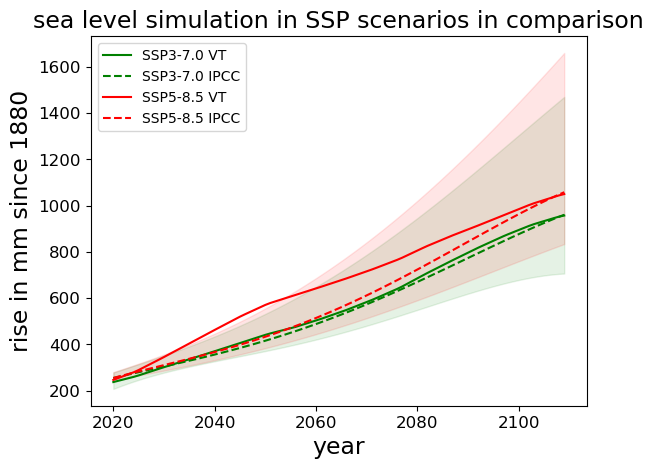

In [2]:
currentmodel = "FrederikeSSTGADFGRIBhist108.h5"
Eval.comparisonssp(modelname=currentmodel, complete=False,nccmip6=True,sealevel=True,modelnamesea='kalaSST104.h5')

1/1 [==============================] - 1s 577ms/step
vgl ssp3: 0.3832959539698429
1/1 [==============================] - 1s 574ms/step
vgl ssp5: 0.3911129387567328


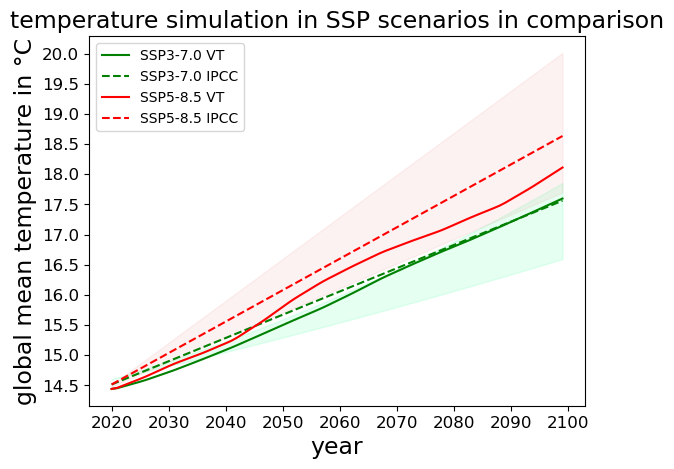

In [4]:
currentmodel = "FrederikeSSTGADFGRIBhist108.h5"
Eval.comparisonssp(modelname=currentmodel, complete=False,nccmip6=True,sealevel=False)

Fig. 5: regionalised temperature simulation in the scenario SSP 3-7.0 in the year 2100 (top); difference of the temperature in 2100 to 2014 in the scenario SSP 3-7.0 (bottom), faster warming of the polar caps relative to other regions

1/1 [==============================] - 1s 602ms/step
plotting
heatmap saved
(5250, 2400, 3)
heatmap cropped
2025-04-21 15:09:24.527775


<Figure size 640x480 with 0 Axes>

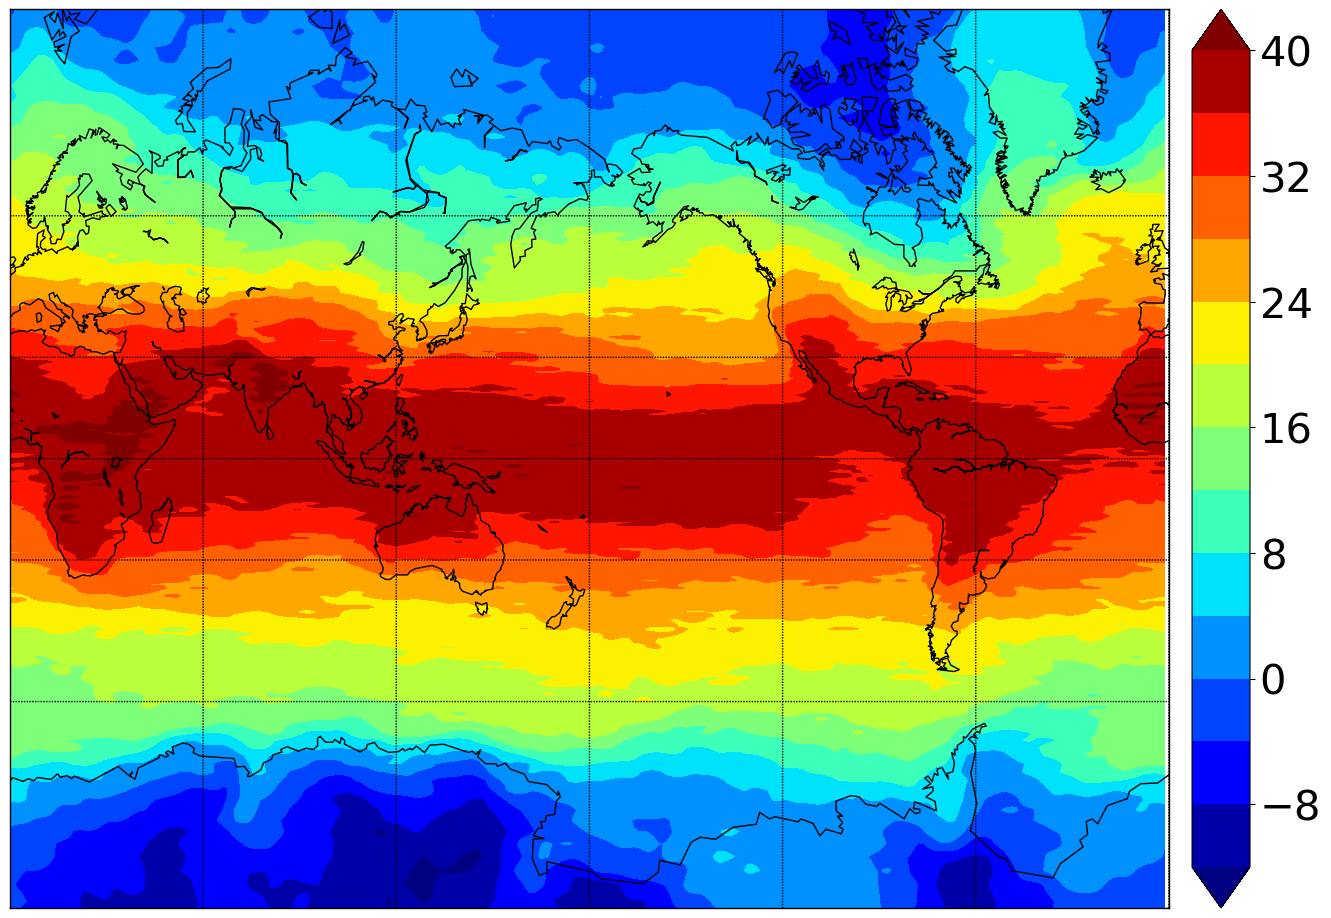

In [3]:
ghgchangesssp3 = [100, 100, 100, -1, -10, -1]
currentmodel = "FrederikeSSTGADFGRIBhist108.h5"
predf = simulation.pred(ghgchanges=ghgchangesssp3, start=2014, end=2114, modelname=currentmodel, withtippingpoints=False, predsea=False, awi=False)
fig = plt.figure()
visuals.visualizegridtemperature(predf[:, :predf[1].size-1], last=True, first=False,
                                     fig=fig, nominmax=True)

plotting
heatmap saved
(5250, 2400, 3)
heatmap cropped
2025-04-20 22:42:29.159112


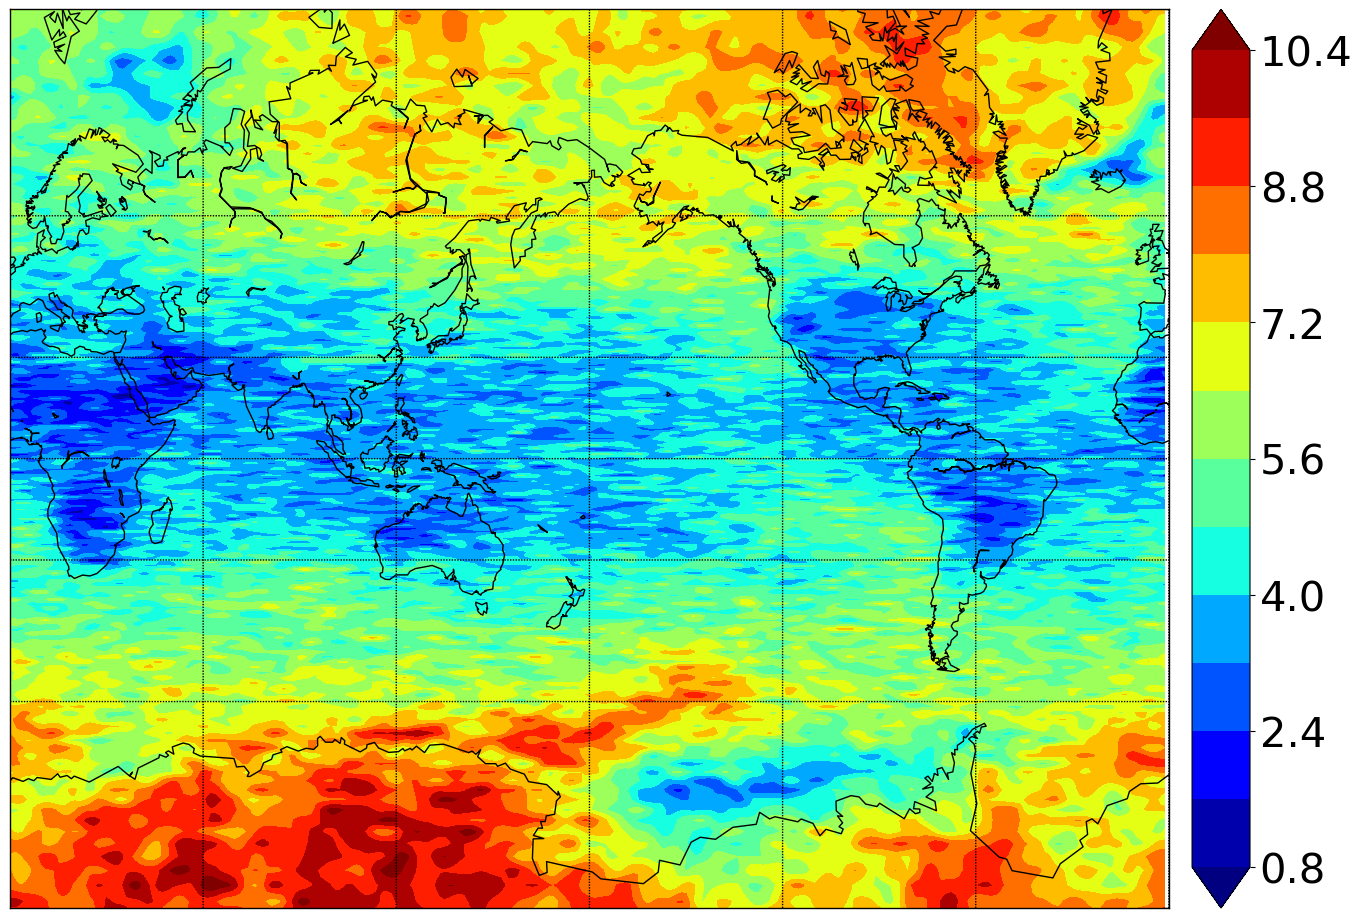

In [5]:
u = 55296
diff = np.ones(u)
for i in range(u):
    diff[i] = predf[99, i] - predf[0, i]

visuals.visualizegridtemperature(np.expand_dims(diff, 0), first=True, last=False, nc=True,fig=fig,nominmax=True)

Fig. 6: Mean regionalised error of the temperature simulation on the training data, error calculated with absolute difference between normalised simulated historical scenarios and historic training data

1/1 [==============================] - 5s 5s/step
plotting
heatmap saved
(5250, 2400, 3)
heatmap cropped
2025-04-20 22:42:56.663498


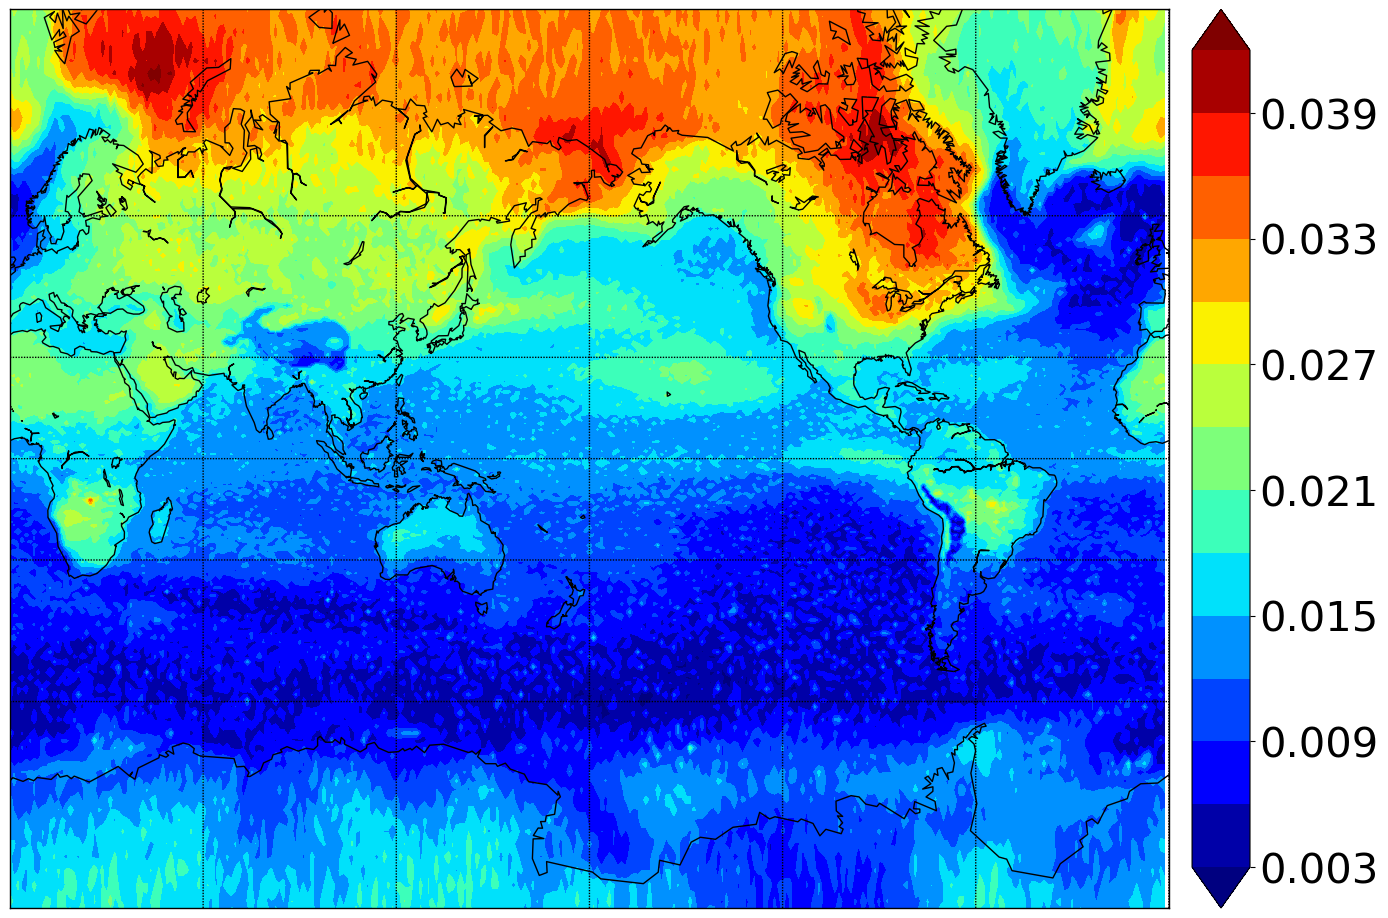

In [6]:
all5matrixhist = np.load('KlimaUi/climatesimulationAI/Training/PreProcessing/trainingdata/all5matrixnew5.npy',mmap_mode='r+')
tempgribtarget6 = np.load('KlimaUi/climatesimulationAI/Training/PreProcessing/trainingdata/tempgribtarget6new4.npy', mmap_mode='r+')
meantempgribtarget6 = np.ones((tempgribtarget6[:,0].size,1))
for i in range(tempgribtarget6[:,0].size):
    meantempgribtarget6[i,0] = np.mean(tempgribtarget6[i])
tempgribtarget6new =  np.concatenate((meantempgribtarget6,tempgribtarget6), axis=1)

u = 55297
modelname = "FrederikeSSTGADFGRIBhist108.h5"
gafsize=20
model = Training.buildSST(gafsize=gafsize,outputsize=u,printsum=False,modelname=modelname,features=all5matrixhist,new=True)
model.load_weights('KlimaUi/climatesimulationAI/models/'+modelname)
pred = model.predict(all5matrixhist)

errorlocal = np.ones(u-1)
for i in range(u-1):
    errorlocaltemp = np.ones(30)
    for j in range(30):
        errorlocaltemp[j] = abs(pred[j,i] - tempgribtarget6new[j,i])
        errorlocal[i] = np.mean(errorlocaltemp)

visuals.visualizegridtemperature(np.expand_dims(errorlocal,0), first=True, last=False, min=0, max=1, nominmax=True, nc=True)

Fig. 7: Development of greenhouse gas (GHG) emissions (left), temperature (right) and sea level rise (bottom) in different scenarios until 2100 with and without considering tipping points, GHG emissions: CO2 - upper graph, CH4 - bottom graph respectively, scenarios: SSP 5-8.5 (triple emissions until 2100), quadruple emissions and quintuple emissions (4x and 5x) until 2100, for explicit temperature difference and trigger years table

1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2073
1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2048
Permafrost was triggerd in year 2088
Triggerd Permafrost Parzelle eurasia
1/1 [==============================] - 1s 522ms/step
Permafrost was triggerd in year 2083
Triggerd Permafrost Parzelle russia east
1/1 [==============================] - 1s 544ms/step
Permafrost was triggerd in year 2093
Triggerd Permafrost Parzelle alaska
1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2038
Permafrost was triggerd in year 2068
Triggerd Permafrost Parzelle eurasia
1/1 [==============================] - 1s 518ms/step
Permafrost was triggerd in year 2068
Triggerd Permafrost Parzelle russia east
1/1 [==============================] - 1s 509ms/st

<Figure size 900x600 with 0 Axes>

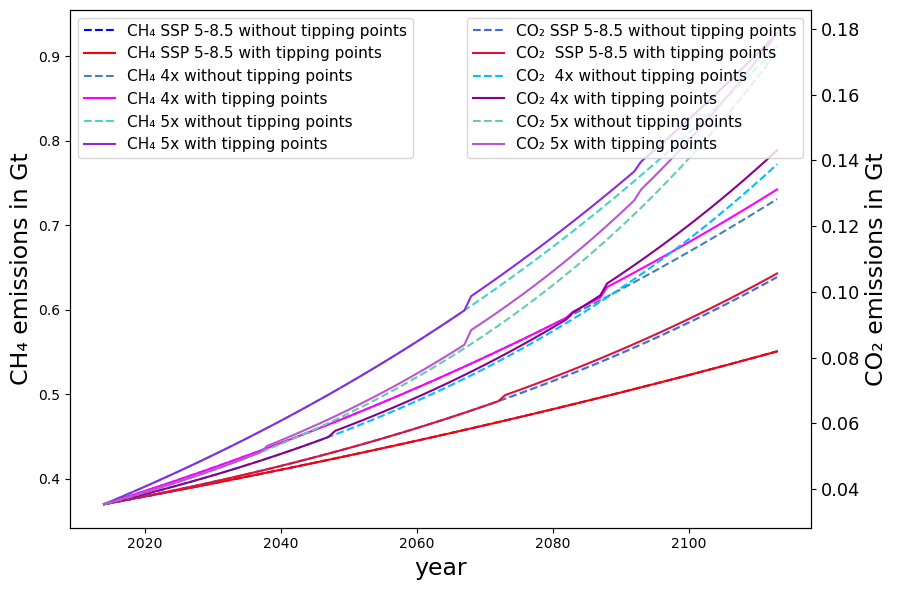

In [2]:
currentmodel = "FrederikeSSTGADFGRIBhist108.h5"
Eval.comparisontippingpoints(modelname=currentmodel, rainforest=True,onlytrigger=True)

1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2073
1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2048
Permafrost was triggerd in year 2088
Triggerd Permafrost Parzelle eurasia
1/1 [==============================] - 1s 546ms/step
Permafrost was triggerd in year 2083
Triggerd Permafrost Parzelle russia east
1/1 [==============================] - 1s 521ms/step
Permafrost was triggerd in year 2093
Triggerd Permafrost Parzelle alaska
1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2038
Permafrost was triggerd in year 2068
Triggerd Permafrost Parzelle eurasia
1/1 [==============================] - 1s 545ms/step
Permafrost was triggerd in year 2068
Triggerd Permafrost Parzelle russia east
1/1 [==============================] - 1s 544ms/st

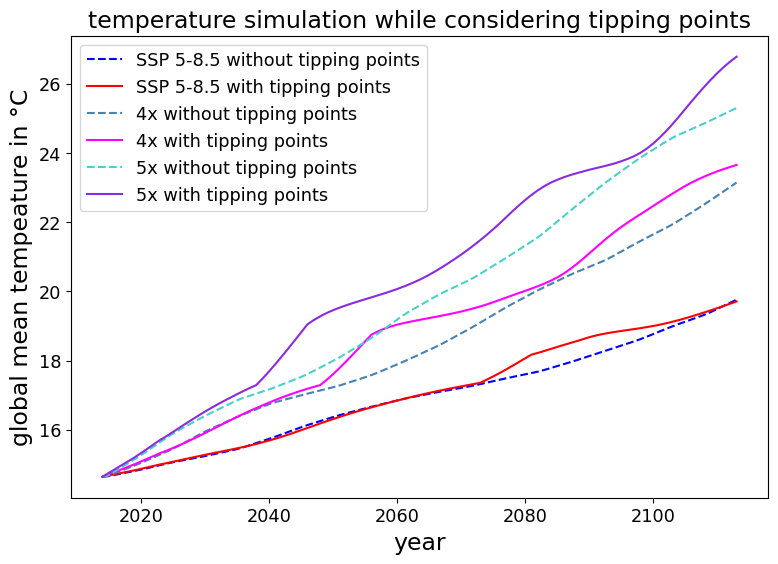

In [4]:
currentmodel = "FrederikeSSTGADFGRIBhist108.h5"
Eval.comparisontippingpoints(modelname=currentmodel, rainforest=True)

1/1 [==============================] - 2s 2s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2098
1/1 [==============================] - 1s 557ms/step
WAIS was triggerd in year 2038
endyear: 2043
duration: 5
endyear: 29
1/1 [==============================] - 3s 3s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2073
1/1 [==============================] - 1s 562ms/step
WAIS was triggerd in year 2034
endyear: 2039
duration: 5
endyear: 25
1/1 [==============================] - 10s 10s/step


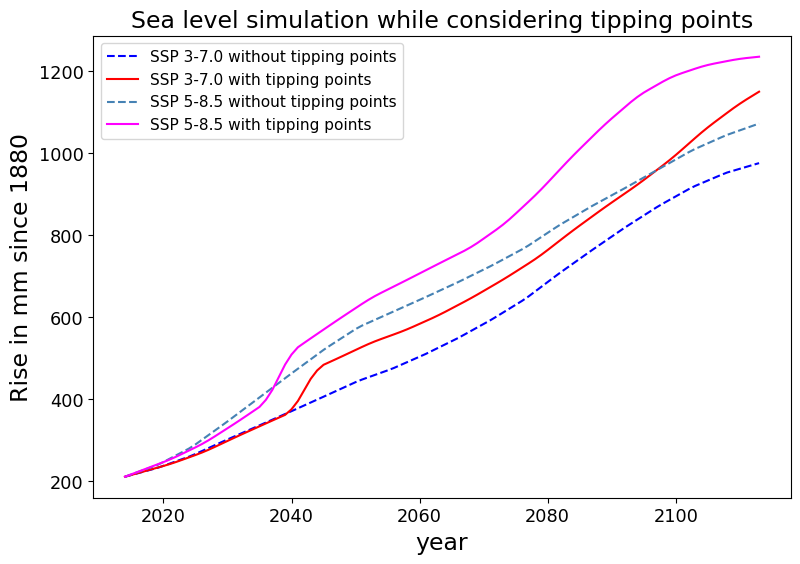

In [3]:
currentmodel = "FrederikeSSTGADFGRIBhist108.h5"
Eval.comparisontippingpoints(modelname=currentmodel, rainforest=True, sea=True,modelnamesea='kalaSST104.h5',wais=True)